In [17]:
library('igraph')
library('Matrix')
library('pracma')
library('resample')

## Question 1

## Question 3

In [137]:
if (!require("igraph")) install.packages('igraph')
if (!require("Matrix")) install.packages('Matrix')
if (!require("pracma")) install.packages('pracma')
if (!require("resample")) install.packages('resample')

### 3-a

In [138]:
# CREATE TWO DIRECTED PREFERENTIAL ATTACHMENT NETWORK WITH m=4
g1 <- barabasi.game(n = 1000, m = 4, directed = T)
g2 <- barabasi.game(n = 1000, m = 4, directed = T)

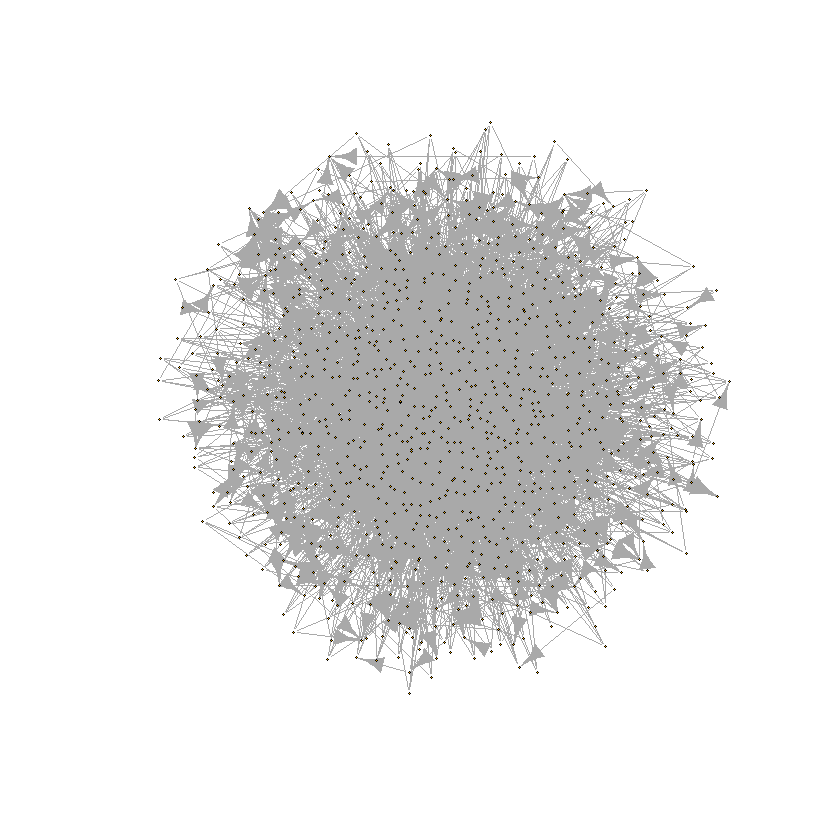

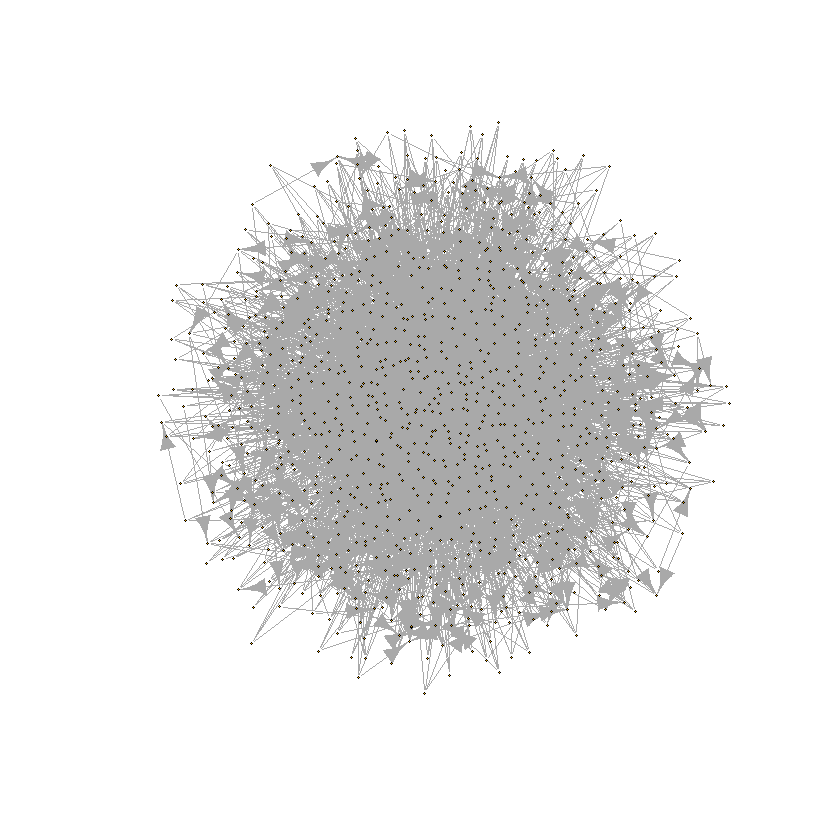

In [139]:
# SEE THE NETWORK
plot(g1, vertex.size=1, vertex.label=NA)
plot(g2, vertex.size=1, vertex.label=NA)

In [140]:
#CHECK
cat("first network vertices:", vcount(g1))
cat("\nfirst network edges:", ecount(g1))
cat("\nsecond network vertices:", vcount(g2))
cat("\nsecond network edges:", ecount(g2))

first network vertices: 1000
first network edges: 3990
second network vertices: 1000
second network edges: 3990

In [141]:
# SHUFFLE
g2_prime <- permute(g2, sample(vcount(g2)))
edge_list <- as_edgelist(g2_prime)

# MERGE
edges <- 1 : length(edge_list)
for(i in 1:length(edges)) {
    col <- (i + 1) %% 2 + 1
    row <- floor((i + 1) / 2)
    edges[i] = edge_list[row, col]
}

g_merge <- add_edges(g1, edges)

In [142]:
#CHECK
cat("the graph is connected or not: ", is.connected(g_merge))
cat("\nmerged network vertices:", vcount(g_merge))
cat("\nmerged network edges:", ecount(g_merge))

the graph is connected or not:  TRUE
merged network vertices: 1000
merged network edges: 7980

In [143]:
# DEFINE TRANSITION MATRIX FUNCTION
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

In [144]:
transition_matrix = create_transition_matrix(g_merge)
print(transition_matrix)

1000 x 1000 sparse Matrix of class "dgCMatrix"
                                                                             
   [1,] .         .         .         .     .     .         .     .     .    
   [2,] 0.2000000 .         .         .     .     .         .     .     .    
   [3,] 0.1666667 0.1666667 .         .     .     .         .     .     .    
   [4,] 0.1428571 0.1428571 0.1428571 .     .     .         .     .     .    
   [5,] 0.1250000 0.1250000 0.1250000 0.125 .     .         .     .     .    
   [6,] 0.1250000 0.1250000 0.1250000 0.125 .     .         .     .     .    
   [7,] 0.1250000 0.1250000 0.1250000 0.125 .     .         .     .     .    
   [8,] 0.1250000 0.1250000 0.1250000 .     .     .         0.125 .     .    
   [9,] 0.1250000 0.1250000 0.1250000 0.125 .     .         .     .     .    
  [10,] 0.1250000 0.1250000 .         0.125 .     0.1250000 .     .     .    
  [11,] 0.1250000 0.1250000 0.1250000 .     0.250 .         .     .     .    
  [12,] .        

In [198]:
# DEFINE RANDOM_WALK FUNCTION WITHOUT TELEPORTATION
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

In [199]:
num_nodes = 1000
pr_3a = rep(0, num_nodes)
num_steps = 100

for (start in 1:1000) {
    end = random_walk(g_merge, num_steps, start, transition_matrix)
    pr_3a[end] = pr_3a[end] + 1
}
pr_3a = pr_3a / 1000

In [195]:
#PRINT THE PROBABILITY
print(pr_3a)

   [1] 0.072 0.053 0.050 0.031 0.007 0.015 0.017 0.010 0.007 0.003 0.030 0.002
  [13] 0.005 0.015 0.002 0.001 0.015 0.000 0.012 0.000 0.000 0.000 0.000 0.000
  [25] 0.001 0.000 0.001 0.002 0.009 0.000 0.000 0.004 0.000 0.006 0.000 0.000
  [37] 0.000 0.000 0.000 0.003 0.000 0.002 0.001 0.000 0.000 0.001 0.003 0.001
  [49] 0.001 0.002 0.011 0.000 0.000 0.004 0.000 0.000 0.001 0.000 0.000 0.000
  [61] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  [73] 0.000 0.004 0.000 0.000 0.003 0.000 0.001 0.006 0.000 0.000 0.000 0.000
  [85] 0.000 0.000 0.000 0.000 0.002 0.000 0.000 0.000 0.001 0.002 0.000 0.023
  [97] 0.000 0.001 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [109] 0.000 0.000 0.000 0.000 0.004 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [121] 0.000 0.006 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000
 [133] 0.000 0.000 0.000 0.000 0.000 0.000 0.011 0.000 0.000 0.000 0.000 0.000
 [145] 0.000 0.000 0.000 0.000 0.000 0.005 0.000 0.0

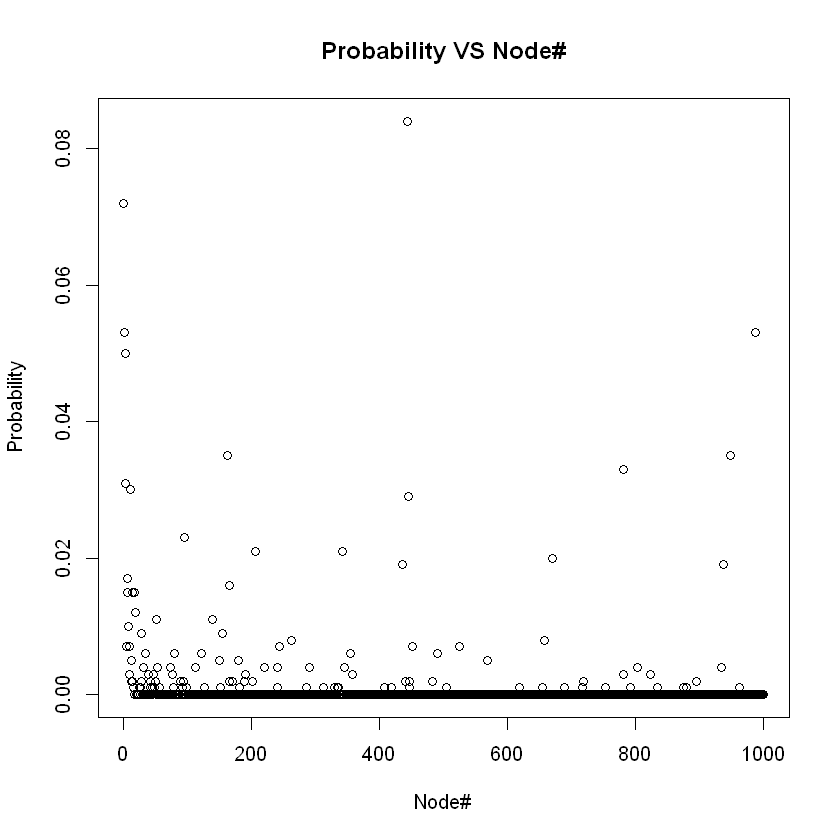

In [196]:
#PLOT
plot(1:vcount(g_merge), pr_3a, main = 'Probability VS Node#', xlab = 'Node#', ylab = 'Probability')

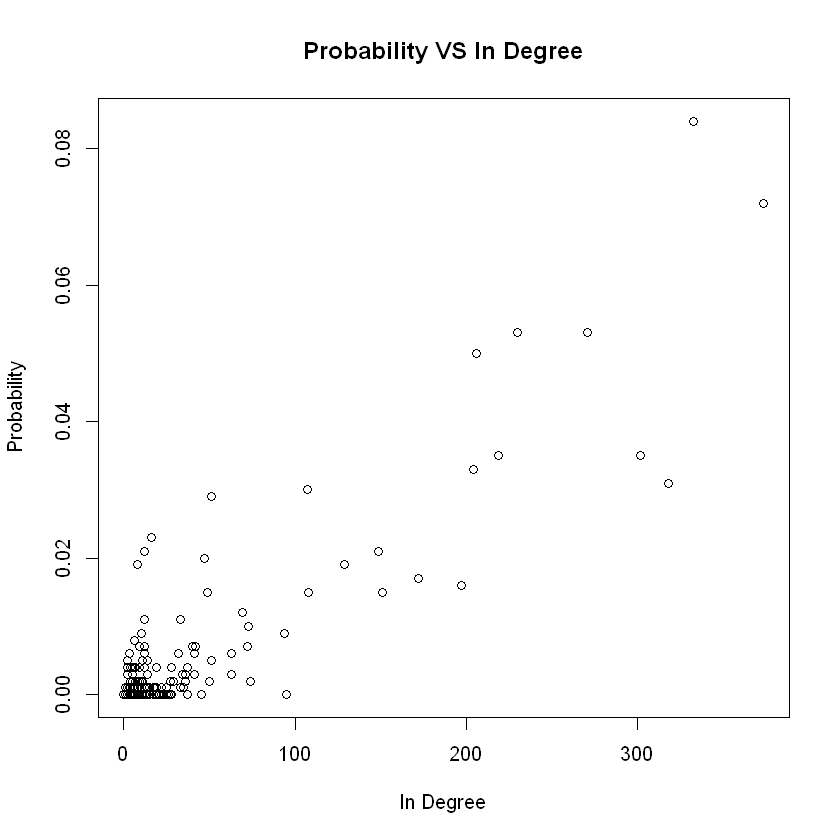

In [197]:
plot(degree(g_merge, mode = 'in'), pr_3a, main = 'Probability VS In Degree', xlab = 'In Degree', ylab = 'Probability')

### 3_b- teleportation probability of α = 0.15

In [156]:
alpha = 0.15
prob_3b = rep(0, num_nodes)

for(start_node in 1:num_nodes) {
    next_node = start_node
    for(i in 1:num_steps) {
        PMF = transition_matrix[start_node, ]
        if(runif(1) < alpha) { # teleportation
            next_node = sample(1:vcount(g_merge), 1, prob = NULL)
        } else {
            next_node = sample(1:vcount(g_merge), 1, prob = PMF)
        }
        start_node = next_node
    }
    prob_3b[next_node] = prob_3b[next_node] + 1
}

prob_3b = prob_3b / 1000

In [157]:
print(prob_3b)

   [1] 0.071 0.044 0.030 0.024 0.009 0.020 0.010 0.006 0.004 0.001 0.023 0.004
  [13] 0.005 0.013 0.002 0.000 0.007 0.001 0.010 0.001 0.001 0.000 0.002 0.006
  [25] 0.001 0.000 0.001 0.002 0.011 0.001 0.000 0.004 0.001 0.004 0.000 0.000
  [37] 0.001 0.001 0.001 0.003 0.001 0.002 0.001 0.000 0.000 0.002 0.002 0.003
  [49] 0.000 0.001 0.007 0.000 0.000 0.005 0.000 0.002 0.001 0.000 0.000 0.000
  [61] 0.000 0.000 0.001 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.001 0.000
  [73] 0.000 0.000 0.000 0.002 0.000 0.001 0.000 0.006 0.002 0.000 0.000 0.002
  [85] 0.000 0.000 0.000 0.000 0.002 0.000 0.000 0.000 0.000 0.001 0.000 0.012
  [97] 0.000 0.000 0.002 0.000 0.000 0.003 0.000 0.000 0.000 0.000 0.000 0.000
 [109] 0.000 0.000 0.000 0.000 0.002 0.000 0.000 0.000 0.001 0.000 0.001 0.000
 [121] 0.000 0.007 0.000 0.000 0.000 0.000 0.003 0.001 0.001 0.000 0.000 0.000
 [133] 0.002 0.000 0.000 0.001 0.000 0.001 0.011 0.000 0.000 0.000 0.000 0.000
 [145] 0.001 0.000 0.001 0.000 0.000 0.000 0.000 0.0

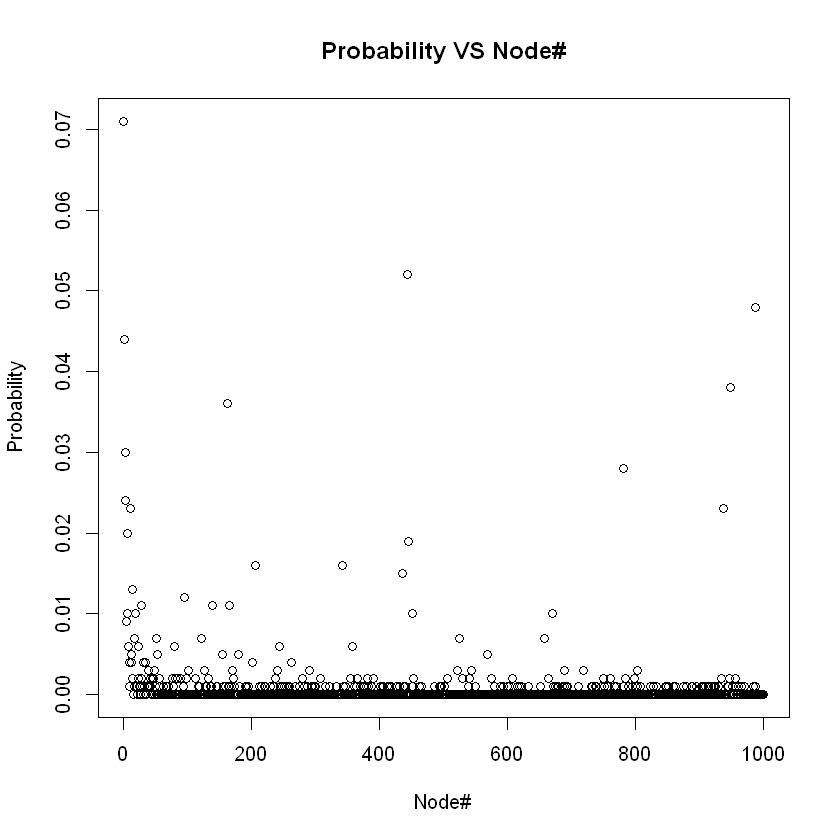

In [158]:
plot(1:vcount(g_merge), prob_3b, main = 'Probability VS Node#', xlab = 'Node#', ylab = 'Probability')

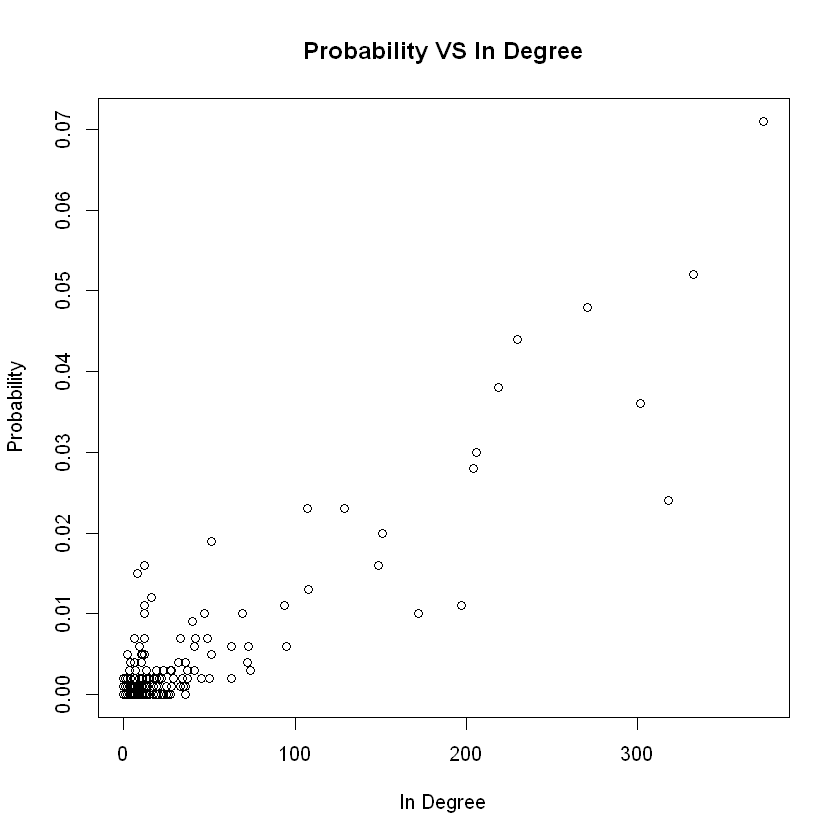

In [159]:
plot(degree(g_merge, mode = 'in'), prob_3b, main = 'Probability VS In Degree', xlab = 'In Degree', ylab = 'Probability')

In [200]:
# DEFINE RANDOM WALK FUNCTION WITH TELEPORTATION
random_walk_teleportation = function (g, num_steps, start_node, alpha = 0.0, pr = NULL, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)
        
        # teleportation
        if (runif(1) < alpha) {
            v = sample(1:vcount(g), 1, prob = pr)
        }
    }
    
    return(v)
}

In [201]:
alpha = 0.15
pr_3b = rep(0, num_nodes)

for(start_node in 1:num_nodes) {
    next_node = random_walk_teleportation(g_merge, num_steps, start_node, alpha, NULL, transition_matrix)
    pr_3b[next_node] = pr_3b[next_node] + 1
}

pr_3b = pr_3b / 1000

In [202]:
print(pr_3b)

   [1] 0.066 0.046 0.046 0.026 0.006 0.023 0.013 0.007 0.011 0.002 0.037 0.005
  [13] 0.005 0.013 0.000 0.000 0.002 0.000 0.009 0.000 0.000 0.000 0.000 0.007
  [25] 0.000 0.000 0.000 0.002 0.007 0.001 0.000 0.002 0.000 0.002 0.000 0.002
  [37] 0.000 0.000 0.000 0.004 0.001 0.004 0.000 0.001 0.000 0.000 0.004 0.000
  [49] 0.003 0.001 0.005 0.000 0.000 0.001 0.000 0.004 0.002 0.000 0.001 0.000
  [61] 0.000 0.000 0.000 0.001 0.000 0.001 0.001 0.001 0.000 0.000 0.000 0.000
  [73] 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.006 0.001 0.000 0.000 0.000
  [85] 0.000 0.001 0.000 0.001 0.004 0.000 0.000 0.001 0.000 0.004 0.000 0.011
  [97] 0.000 0.001 0.001 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.001 0.000
 [109] 0.001 0.000 0.000 0.000 0.006 0.000 0.000 0.000 0.001 0.000 0.001 0.000
 [121] 0.000 0.005 0.001 0.001 0.000 0.000 0.002 0.002 0.000 0.000 0.000 0.000
 [133] 0.000 0.000 0.000 0.000 0.001 0.000 0.008 0.000 0.000 0.000 0.002 0.000
 [145] 0.001 0.000 0.000 0.000 0.001 0.001 0.000 0.0

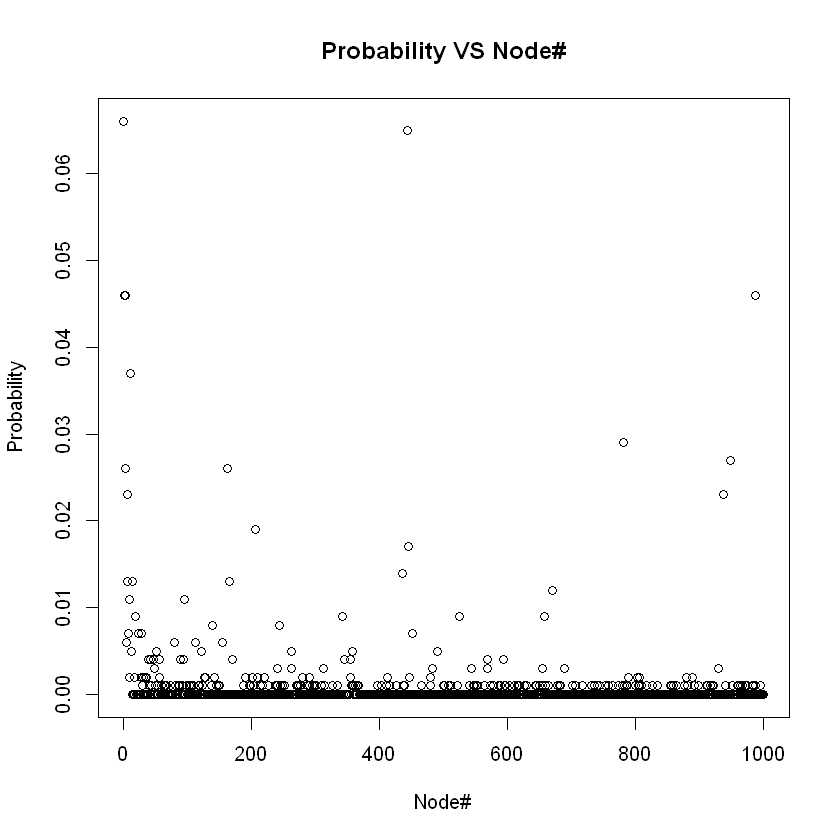

In [204]:
plot(1:vcount(g_merge), pr_3b, main = 'Probability VS Node#', xlab = 'Node#', ylab = 'Probability')

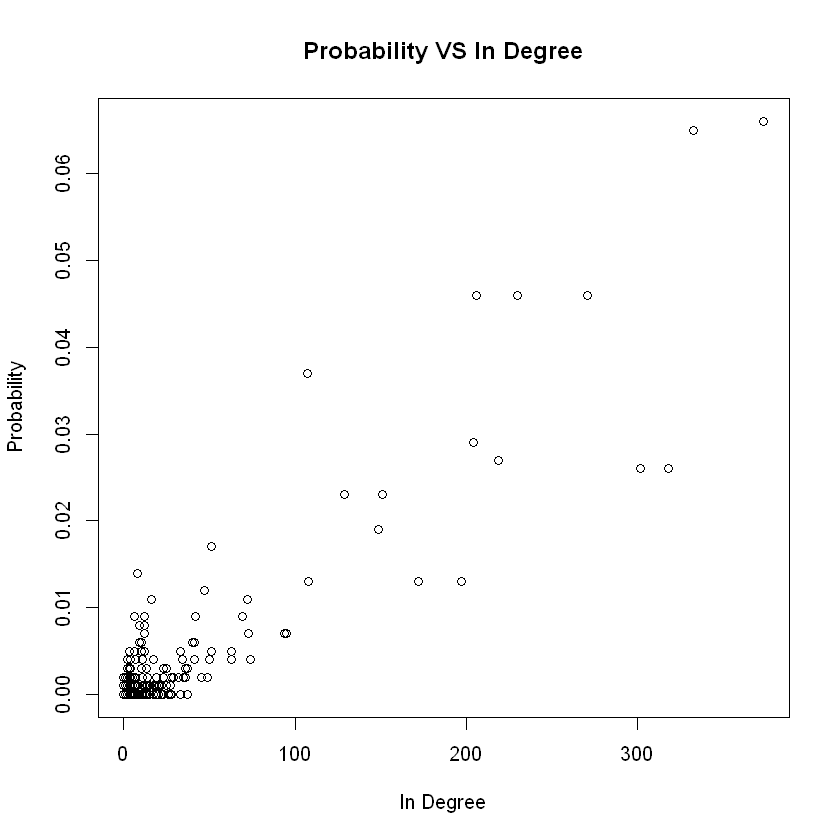

In [205]:
plot(degree(g_merge, mode = 'in'), pr_3b, main = 'Probability VS In Degree', xlab = 'In Degree', ylab = 'Probability')

## Question 4

### 4_a

In [206]:
alpha = 0.15
pr_4a = rep(0, num_nodes)

for(start_node in 1:num_nodes) {
    next_node = random_walk_teleportation(g_merge, num_steps, start_node, alpha, pr_3b, transition_matrix)
    pr_4a[next_node] = pr_4a[next_node] + 1
}

pr_4a = pr_4a / 1000

In [207]:
print(pr_4a)

   [1] 0.068 0.039 0.053 0.028 0.009 0.019 0.021 0.004 0.005 0.002 0.028 0.001
  [13] 0.002 0.014 0.001 0.001 0.007 0.000 0.014 0.000 0.000 0.000 0.001 0.004
  [25] 0.000 0.000 0.000 0.002 0.006 0.000 0.000 0.002 0.000 0.003 0.000 0.000
  [37] 0.000 0.001 0.001 0.004 0.000 0.005 0.000 0.000 0.000 0.001 0.004 0.001
  [49] 0.000 0.004 0.003 0.000 0.000 0.002 0.000 0.002 0.002 0.000 0.000 0.000
  [61] 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000
  [73] 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.005 0.002 0.000 0.000 0.000
  [85] 0.000 0.000 0.000 0.000 0.005 0.000 0.000 0.000 0.000 0.002 0.002 0.016
  [97] 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.001 0.000
 [109] 0.001 0.001 0.000 0.000 0.008 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [121] 0.000 0.007 0.000 0.000 0.001 0.000 0.003 0.000 0.000 0.000 0.000 0.000
 [133] 0.000 0.000 0.000 0.000 0.000 0.000 0.010 0.000 0.000 0.000 0.000 0.000
 [145] 0.000 0.000 0.000 0.000 0.000 0.002 0.000 0.0

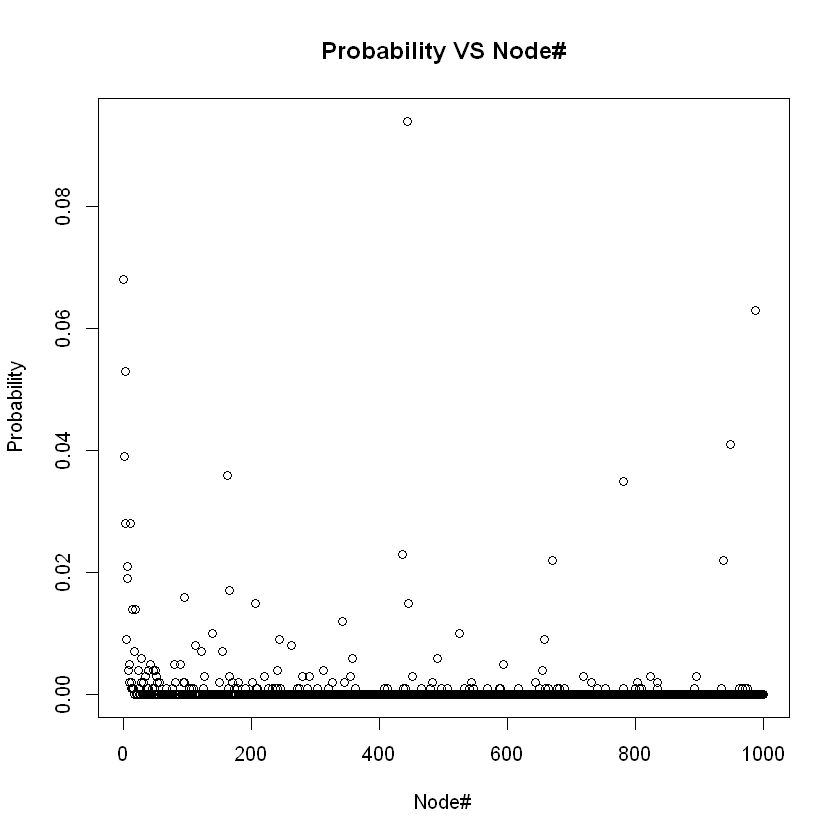

In [208]:
plot(1:vcount(g_merge), pr_4a, main = 'Probability VS Node#', xlab = 'Node#', ylab = 'Probability')

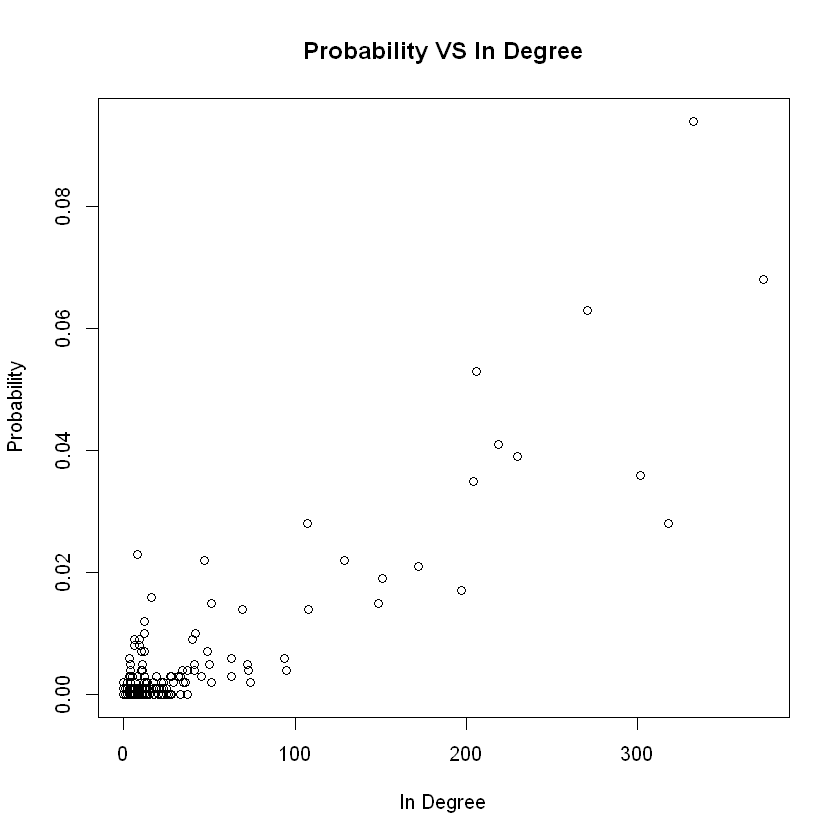

In [209]:
plot(degree(g_merge, mode = 'in'), pr_4a, main = 'Probability VS In Degree', xlab = 'In Degree', ylab = 'Probability')

### 4_b

In [180]:
# FIND TWO NODES IN THE NETWORK WITH MEDIAN PR
len = length(pr_3b)
len
node1 = order(pr_3b)[len / 2]
node2 = order(pr_3b)[len / 2 + 1]

[1] 1000

In [178]:
cat("1st node in median PageRank:", node1, "\n")
cat("2nd node in median PageRank:", node2, "\n")

1st node in median PageRank: 717 
2nd node in median PageRank: 718 


In [190]:
alpha = 0.15
pr_4b = rep(0, num_nodes)

pr = rep(0, num_nodes)
pr[node1] = 1/2
pr[node2] = 1/2

for(start_node in 1:num_nodes) {
    next_node = random_walk_teleportation(g_merge, num_steps, start_node, alpha, pr, transition_matrix)
    pr_4b[next_node] = pr_4b[next_node] + 1
}

pr_4b = pr_4b / 1000

In [191]:
print(pr_4b)

   [1] 0.054 0.037 0.041 0.038 0.011 0.013 0.008 0.004 0.009 0.007 0.020 0.003
  [13] 0.001 0.009 0.001 0.000 0.006 0.000 0.012 0.000 0.000 0.001 0.000 0.001
  [25] 0.000 0.000 0.000 0.000 0.012 0.000 0.000 0.014 0.000 0.002 0.000 0.000
  [37] 0.000 0.000 0.000 0.001 0.000 0.003 0.001 0.001 0.000 0.002 0.000 0.001
  [49] 0.000 0.002 0.008 0.000 0.000 0.002 0.000 0.002 0.000 0.000 0.000 0.000
  [61] 0.000 0.000 0.000 0.000 0.000 0.000 0.007 0.000 0.000 0.000 0.000 0.000
  [73] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.005 0.001 0.000 0.000 0.000
  [85] 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.001 0.006 0.002 0.011
  [97] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 [109] 0.000 0.000 0.000 0.000 0.003 0.000 0.000 0.000 0.000 0.000 0.000 0.001
 [121] 0.000 0.005 0.000 0.000 0.000 0.001 0.003 0.000 0.000 0.000 0.000 0.000
 [133] 0.000 0.000 0.000 0.000 0.000 0.000 0.007 0.000 0.000 0.000 0.000 0.000
 [145] 0.000 0.000 0.003 0.000 0.001 0.002 0.000 0.0

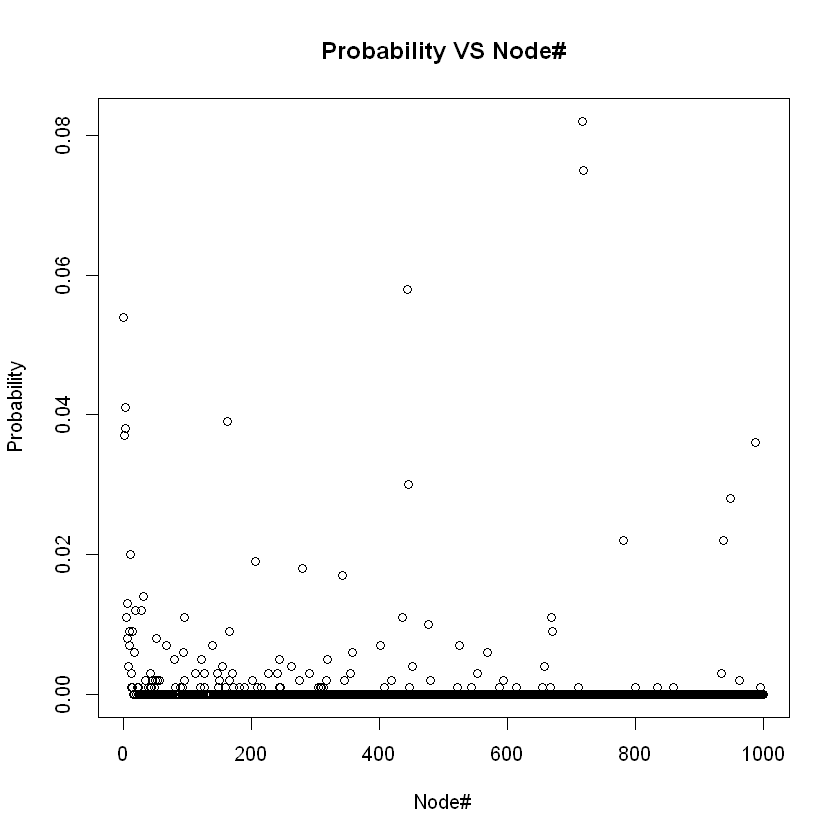

In [192]:
plot(1:vcount(g_merge), pr_4b, main = 'Probability VS Node#', xlab = 'Node#', ylab = 'Probability')

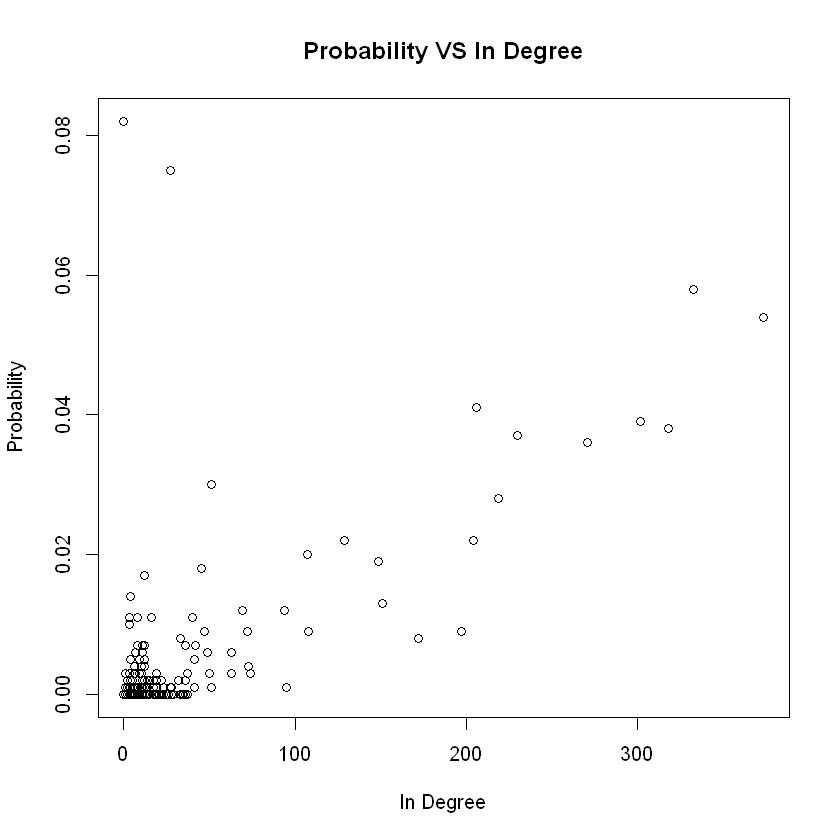

In [193]:
plot(degree(g_merge, mode = 'in'), pr_4b, main = 'Probability VS In Degree', xlab = 'In Degree', ylab = 'Probability')

## Ignore the following

In [ ]:
# g = random.graph.game(1000, 0.01, directed=F)
# # Random walk on GCC
# g.components = clusters(g)
# ix = which.max(g.components$csize) # Idx of the largest component
# g.giant = induced.subgraph(g, which(g.components$membership == ix)) # Get the subgraph of GCC

In [ ]:
# # Find diameter
# cur_diameter = diameter(g.giant, directed = FALSE)
# cat(paste("\nDiameter of GCC: ", cur_diameter))

# cur_connected = is.connected(g)
# cat(paste('\nIs the graph connected: ', cur_connected))

In [ ]:
# ts = seq(1:20) # Number of steps.
# itr_times = 1000
# tm = create_transition_matrix(g.giant)

# # Store mean and var
# avg_dist = c()
# var_dist = c()

# # Random walk
# for (t in ts) {
#     temp_dist = c()
#     for (i in 1:itr_times) {
#         start_node = sample(vcount(g.giant), 1)
#         last_node = random_walk(g.giant, t, start_node, transition_matrix)
#         cur_distance = distances(g.giant, start_node, last_node)
#         temp_distances = c(temp_distances, cur_distance)
#     }
#     avg_distances = c(avg_distances, mean(temp_distances))
#     var_distances = c(var_distances, var(temp_distances))
# }